In [23]:
import numpy as np
import pandas as pd
import twosigmafunc
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
train = pd.read_hdf('train.h5')

In [3]:
train = train[['id', 'timestamp', 'technical_20', 'technical_30', 'technical_13', 'y']]

In [4]:
train.head()

,id,timestamp,technical_20,technical_30,technical_13,y
0,10,0,0.000000,0.0,0.001652,-0.011753
1,11,0,0.000000,0.0,0.004317,-0.001240
2,12,0,0.006942,0.0,0.000000,-0.020940
3,25,0,0.006766,0.0,0.000000,-0.015959
4,26,0,0.006236,0.0,0.000000,-0.007338


# These 3 features appear and disappear together 

In [5]:
train.loc[(train.technical_13==train.technical_13) & (train.technical_20!=train.technical_20)]

,id,timestamp,technical_20,technical_30,technical_13,y


In [12]:
train.loc[(train.technical_13==train.technical_13) & (train.technical_20==train.technical_20)].shape

(1705992, 6)

In [15]:
train.technical_20.notnull().sum()

1705992

In [16]:
train.technical_30.notnull().sum()

1705992

In [18]:
train.loc[(train.technical_30==train.technical_30) & (train.technical_20==train.technical_20)].shape

(1705992, 6)

In [19]:
train.loc[(train.technical_30==train.technical_30) & (train.technical_20!=train.technical_20)].shape

(0, 6)

#  orthogonal to each other

In [28]:
train.dropna(how='any', inplace=True, axis=0)
train.loc[(train.technical_13!=0) & (train.technical_20!=0)].shape

(0, 6)

In [29]:
train.loc[(train.technical_30!=0) & (train.technical_20!=0)].shape

(0, 6)

# tec vs y_cumsum() 

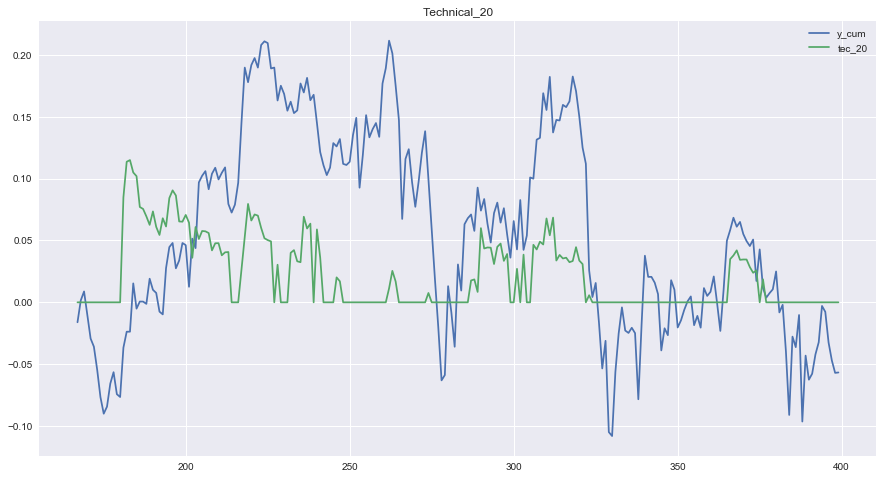

In [45]:
id = 20
plt.plot(train.loc[(train.id==id) & (train.timestamp<400), ['timestamp']], train.loc[(train.id==id) & (train.timestamp<400), ['y']].cumsum(), label='y_cum')
plt.plot(train.loc[(train.id==id) & (train.timestamp<400), ['timestamp']], train.loc[(train.id==id) & (train.timestamp<400), ['technical_20']] * 10, label='tec_20')
plt.title('Technical_20')
plt.legend()

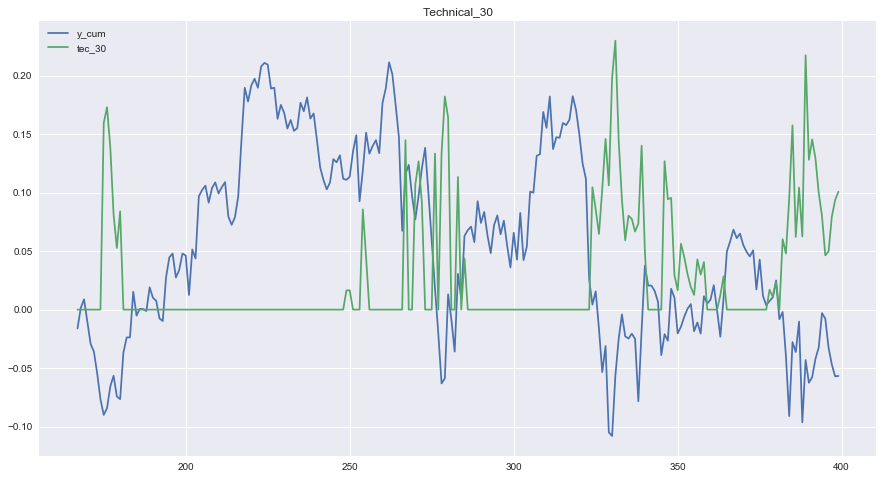

In [38]:
plt.plot(train.loc[(train.id==id) & (train.timestamp<400), ['timestamp']], train.loc[(train.id==id) & (train.timestamp<400), ['y']].cumsum(), label='y_cum')
plt.plot(train.loc[(train.id==id) & (train.timestamp<400), ['timestamp']], train.loc[(train.id==id) & (train.timestamp<400), ['technical_30']] * 20, label='tec_30')
plt.title('Technical_30')
plt.legend()

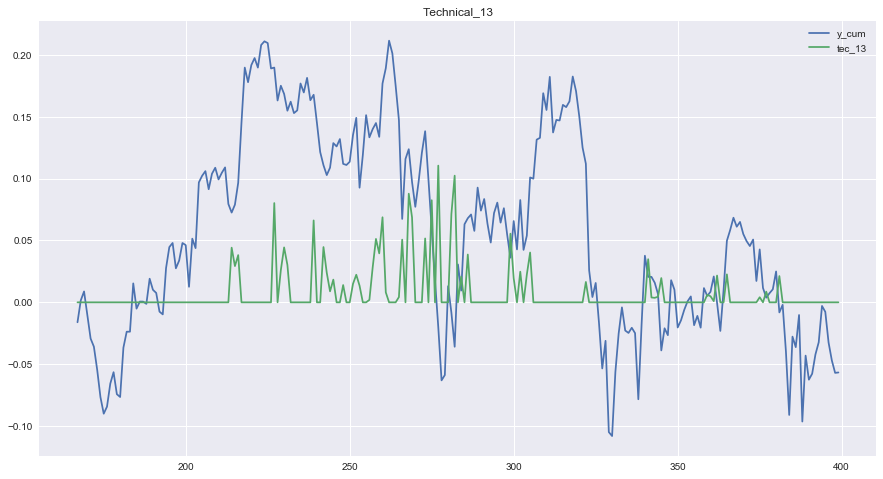

In [36]:
plt.plot(train.loc[(train.id==id) & (train.timestamp<400), ['timestamp']], train.loc[(train.id==id) & (train.timestamp<400), ['y']].cumsum(), label='y_cum')
plt.plot(train.loc[(train.id==id) & (train.timestamp<400), ['timestamp']], train.loc[(train.id==id) & (train.timestamp<400), ['technical_13']] * 25, label='tec_13')
plt.title('Technical_13')
plt.legend()

# Technical_20 - Technical_30 

In [10]:
train.fillna(0, inplace=True)
np.corrcoef(train.technical_20, train.y)[0][1]

-0.016415424597372077

In [11]:
np.corrcoef(train.technical_20 - train.technical_30, train.y)[0][1]

-0.019681848488908974

In [13]:
np.corrcoef(train.technical_20 - train.technical_30, train.y.shift().fillna(0))[0][1]

0.00087320335522454262

In [14]:
np.corrcoef((train.technical_20 - train.technical_30).diff().fillna(0), train.y)[0][1]

-0.015682158020683765

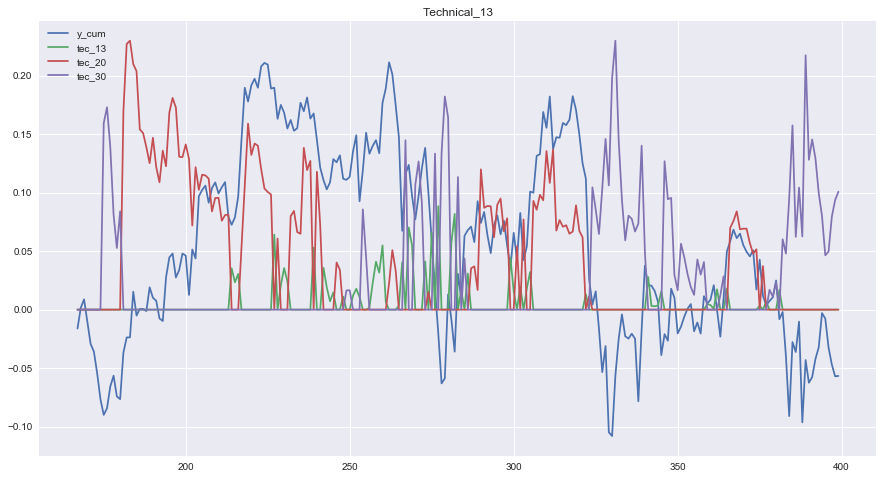

In [39]:
plt.plot(train.loc[(train.id==id) & (train.timestamp<400), ['timestamp']], train.loc[(train.id==id) & (train.timestamp<400), ['y']].cumsum(), label='y_cum')
plt.plot(train.loc[(train.id==id) & (train.timestamp<400), ['timestamp']], train.loc[(train.id==id) & (train.timestamp<400), ['technical_13']] * 20, label='tec_13')
plt.plot(train.loc[(train.id==id) & (train.timestamp<400), ['timestamp']], train.loc[(train.id==id) & (train.timestamp<400), ['technical_20']] * 20, label='tec_20')
plt.plot(train.loc[(train.id==id) & (train.timestamp<400), ['timestamp']], train.loc[(train.id==id) & (train.timestamp<400), ['technical_30']] * 20, label='tec_30')
plt.title('Technical_all')
plt.legend()

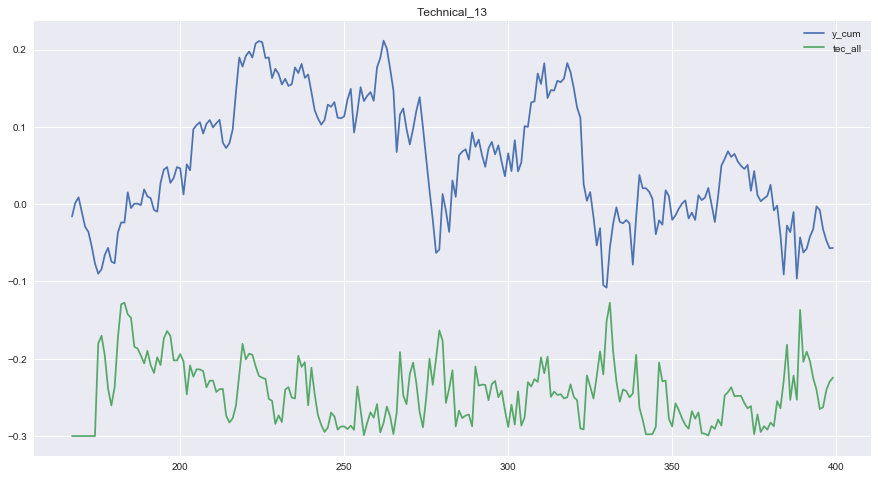

In [43]:
plt.plot(train.loc[(train.id==id) & (train.timestamp<400), ['timestamp']], train.loc[(train.id==id) & (train.timestamp<400),
                                                                                     ['y']].cumsum(), label='y_cum')
plt.plot(train.loc[(train.id==id) & (train.timestamp<400), ['timestamp']], 
         train.loc[(train.id==id) & (train.timestamp<400), ['technical_13', 'technical_20', 'technical_30']].sum(axis=1) * 15 - 0.3, 
         label='tec_all')
plt.title('Technical_13')
plt.legend()

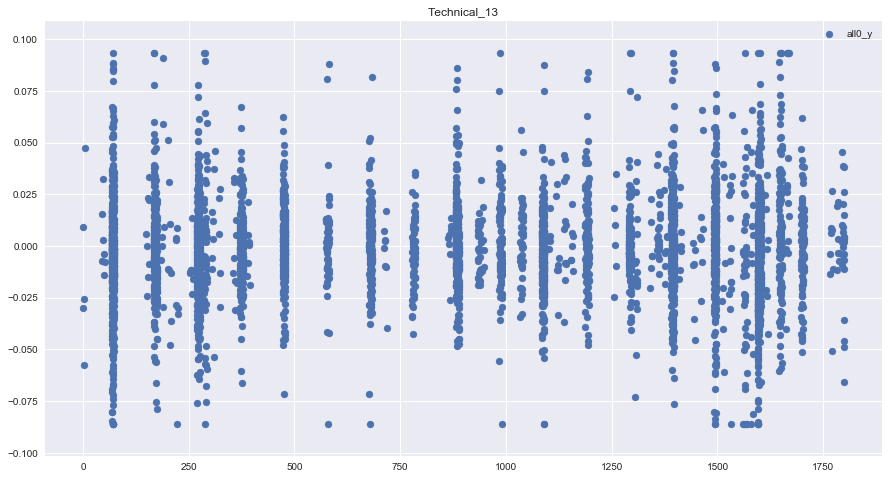

In [50]:
all0_train = train.loc[(train.technical_20 + train.technical_30 + train.technical_13)==0]
plt.scatter(all0_train.loc[train.timestamp < 1800, ['timestamp']], all0_train.loc[train.timestamp < 1800, ['y']], label='all0_y')
plt.title('Technical_13')
plt.legend()

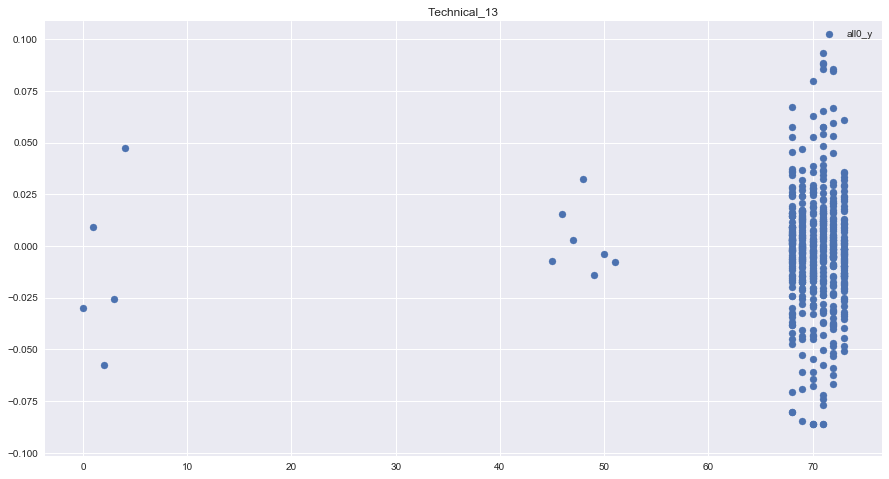

In [51]:
all0_train = train.loc[(train.technical_20 + train.technical_30 + train.technical_13)==0]
plt.scatter(all0_train.loc[train.timestamp < 100, ['timestamp']], all0_train.loc[train.timestamp < 100, ['y']], label='all0_y')
plt.title('Technical_13')
plt.legend()

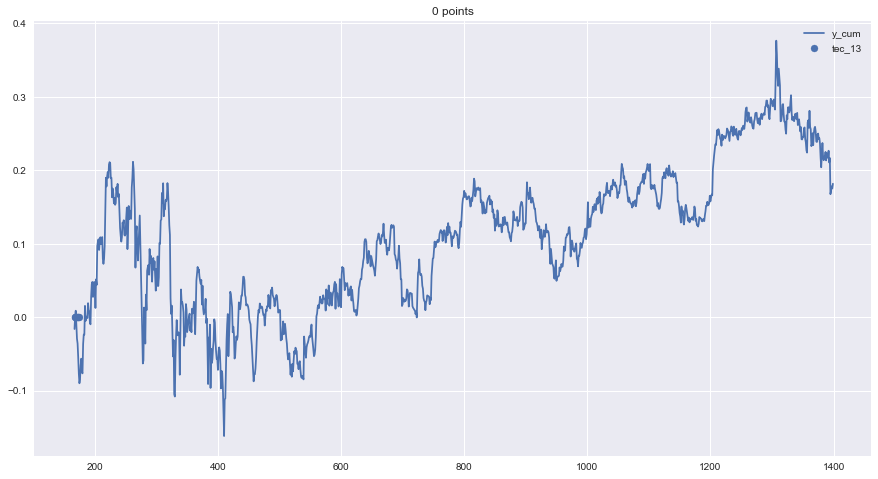

In [53]:
plt.plot(train.loc[(train.id==id) & (train.timestamp<1400), ['timestamp']], train.loc[(train.id==id) & (train.timestamp<1400), ['y']].cumsum(), label='y_cum')
plt.scatter(all0_train.loc[(all0_train.id==id) & (all0_train.timestamp<1400), ['timestamp']], all0_train.loc[(all0_train.id==id) & (all0_train.timestamp<1400), ['technical_13']] * 25, label='tec_13')
plt.title('0 points')
plt.legend()